1. 아웃라이어 제거
2. 연-월 기준으로 그래프 그려보기

# 영화 관람객 수 예측

## 컬럼 설명

* **title** : 영화의 제목
* **distributor** : 배급사
* **genre** : 장르
* **release_time** : 개봉일
* **time** : 상영시간(분)
* **screening_rat** : 상영등급
* **director** : 감독이름
* **dir_prev_bfnum** : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* **dir_prev_num** : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* **num_staff** : 스텝수
* **num_actor** : 주연배우수
* **box_off_num** : 관객수

In [663]:
import pandas as pd
import numpy as np
# 지수표현 제거, 소수점 첫번째 자리까지 표현
pd.options.display.float_format = '{:.5f}'.format

## Load Dataset

In [664]:
train = pd.read_csv("./data/movies_train.csv")

print(train.shape)
print(train.dtypes)
train.head(10)

(600, 12)
title              object
distributor        object
genre              object
release_time       object
time                int64
screening_rat      object
director           object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
dtype: object


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00000,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00000,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,nan,0,138,3,868


In [665]:
test = pd.read_csv("./data/movies_test.csv")

print(test.shape)
print(train.dtypes)
test.head()

(243, 11)
title              object
distributor        object
genre              object
release_time       object
time                int64
screening_rat      object
director           object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
dtype: object


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.00000,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25000,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.66667,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.00000,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.00000,1,380,1


## Preprocessing

### 결측치 체크

In [666]:
# # dir_prev_bfnum의 nan 값을 나머지 데이터 관객수의 평균값으로 수정
# dir_prev_bfnum_mean = train[train["dir_prev_bfnum"] > 0]["dir_prev_bfnum"].mean()
# train.loc[train["dir_prev_bfnum"].isnull(), "dir_prev_bfnum"] = dir_prev_bfnum_mean

# dir_prev_bfnum_mean = test[train["dir_prev_bfnum"] > 0]["dir_prev_bfnum"].mean()
# test.loc[test["dir_prev_bfnum"].isnull(), "dir_prev_bfnum"] = dir_prev_bfnum_mean
# train.head()

# dir_prev_bfnum의 nan 값을 0으로 수정
train = train.fillna(0)
test = test.fillna(0)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387


### log 스케일 변환

In [667]:
train["dir_prev_bfnum_log"] = np.log(1+train["dir_prev_bfnum"])
train["dir_prev_num_log"] = np.log(1+train["dir_prev_num"])
train["num_actor_log"] = np.log(1+train["num_actor"])
train["num_staff_log"] = np.log(1+train["num_staff"])
train["box_off_num_log"] = np.log(1+train["box_off_num"])

test["dir_prev_bfnum_log"] = np.log(1+test["dir_prev_bfnum"])
test["dir_prev_num_log"] = np.log(1+test["dir_prev_num"])
test["num_actor_log"] = np.log(1+test["num_actor"])
test["num_staff_log"] = np.log(1+test["num_staff"])

### 이상치 제거

In [668]:
train.sort_values(by="dir_prev_bfnum").tail(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,box_off_num_log
409,타짜-신의 손,롯데엔터테인먼트,드라마,2014-09-03,147,청소년 관람불가,강형철,7838528.50000,2,583,4,4015364,15.87456,1.09861,1.60944,6.36990,15.20564
118,라스트 갓파더,영구아트무비,코미디,2010-12-29,103,12세 관람가,심형래,7855474.00000,1,31,5,2541603,15.87672,0.69315,1.79176,3.46574,14.74831
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.00000,1,572,11,7453715,15.92249,0.69315,2.48491,6.35089,15.82422
214,초능력자,(주)NEW,SF,2010-11-10,114,15세 관람가,김민석,8801639.00000,2,500,3,2130645,15.99045,1.09861,1.38629,6.21661,14.57194
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,17615314.00000,1,27,3,8,16.68428,0.69315,1.38629,3.33220,2.19722


In [669]:
# 타부:금지된사랑 이상치 제거
train = train.drop([338])
train.sort_values(by="dir_prev_bfnum").tail(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,box_off_num_log
326,검은 사제들,CJ 엔터테인먼트,미스터리,2015-11-05,108,15세 관람가,장재현,6720926.50000,2,369,2,5443049,15.72074,1.09861,1.09861,5.91350,15.50985
409,타짜-신의 손,롯데엔터테인먼트,드라마,2014-09-03,147,청소년 관람불가,강형철,7838528.50000,2,583,4,4015364,15.87456,1.09861,1.60944,6.36990,15.20564
118,라스트 갓파더,영구아트무비,코미디,2010-12-29,103,12세 관람가,심형래,7855474.00000,1,31,5,2541603,15.87672,0.69315,1.79176,3.46574,14.74831
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.00000,1,572,11,7453715,15.92249,0.69315,2.48491,6.35089,15.82422
214,초능력자,(주)NEW,SF,2010-11-10,114,15세 관람가,김민석,8801639.00000,2,500,3,2130645,15.99045,1.09861,1.38629,6.21661,14.57194


### 날짜, 요일 정제

In [670]:
# 개봉일을 연,월,일 컬럼에 각각 저장하고 요일(0-월 ~ 6-일)도 저장
# release_time의 타입을 datetime으로 변경
train["release_time"] = pd.to_datetime(train["release_time"], format='%Y-%m-%d', errors='raise')
train["release_time_year"] = train["release_time"].dt.year
train["release_time_month"] = train["release_time"].dt.month
train["release_time_day"] = train["release_time"].dt.day
train["day_of_the_week"] = train["release_time"].dt.dayofweek

# release_time의 타입을 datetime으로 변경
test["release_time"] = pd.to_datetime(test["release_time"], format='%Y-%m-%d', errors='raise')
test["release_time_year"] = test["release_time"].dt.year
test["release_time_month"] = test["release_time"].dt.month
test["release_time_day"] = test["release_time"].dt.day
test["day_of_the_week"] = test["release_time"].dt.dayofweek

train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,...,box_off_num,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,box_off_num_log,release_time_year,release_time_month,release_time_day,day_of_the_week
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,...,23398,0.00000,0.00000,1.09861,4.52179,10.06045,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,...,7072501,13.96531,1.09861,1.38629,5.96101,15.77172,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,...,6959083,12.30491,1.60944,1.60944,5.84064,15.75556,2013,6,5,2
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,...,217866,10.08142,1.09861,1.94591,3.04452,12.29164,2012,7,12,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,...,483387,0.69315,0.69315,1.09861,5.52943,13.08857,2010,11,4,3


### 장르 정제

In [671]:
# '장르' 컬럼에 one-hot-encoding 사용
train_dummy = pd.get_dummies(train, columns=['genre'], prefix='genre')
train_dummy = train_dummy.drop("genre_공포", axis=1)
test_dummy = pd.get_dummies(test, columns=['genre'], prefix='genre')
test_dummy = test_dummy.drop("genre_공포", axis=1)
train_dummy.head()

# train_encoded = train
# test_encoded = test

,title,distributor,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,...,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디
0,개들의 전쟁,롯데엔터테인먼트,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,...,0,0,0,0,0,0,0,0,1,0
1,내부자들,(주)쇼박스,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,...,1,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,(주)쇼박스,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,...,0,0,0,0,0,0,0,0,1,0
3,나는 공무원이다,(주)NEW,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,...,0,0,0,0,0,0,0,0,0,1
4,불량남녀,쇼박스(주)미디어플렉스,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,...,0,0,0,0,0,0,0,0,0,1


### 상영등급 정제

In [672]:
# '상영등급' 컬럼에 one-hot-encoding 사용
train_dummy = pd.get_dummies(train_dummy, columns=['screening_rat'], prefix='screening_rat')
train_dummy = train_dummy.drop("screening_rat_청소년 관람불가", axis=1)
test_dummy = pd.get_dummies(test_dummy, columns=['screening_rat'], prefix='screening_rat')
test_dummy = test_dummy.drop("screening_rat_청소년 관람불가", axis=1)

train_dummy.head()

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가
0,개들의 전쟁,롯데엔터테인먼트,2012-11-22,96,조병옥,0.00000,0,91,2,23398,...,0,0,0,0,0,1,0,0,0,0
1,내부자들,(주)쇼박스,2015-11-19,130,우민호,1161602.50000,2,387,3,7072501,...,0,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,(주)쇼박스,2013-06-05,123,장철수,220775.25000,4,343,4,6959083,...,0,0,0,0,0,1,0,0,1,0
3,나는 공무원이다,(주)NEW,2012-07-12,101,구자홍,23894.00000,2,20,6,217866,...,0,0,0,0,0,0,1,0,0,1
4,불량남녀,쇼박스(주)미디어플렉스,2010-11-04,108,신근호,1.00000,1,251,2,483387,...,0,0,0,0,0,0,1,0,1,0


### 배급사 정제

In [673]:
# 배급사는 one-hot-encoding 대신 숫자로 구분
distributor_arr = train_dummy["distributor"].unique()

for i in range(len(distributor_arr)):
    train_dummy.loc[train_dummy["distributor"] == distributor_arr[i], "distributor_coded"] = np.where(distributor_arr == distributor_arr[i])

train.head()

distributor_arr = test_dummy["distributor"].unique()
for i in range(len(distributor_arr)):
    test_dummy.loc[test_dummy["distributor"] == distributor_arr[i], "distributor_coded"] = np.where(distributor_arr == distributor_arr[i])

test.head()

# train_dummy = pd.get_dummies(train_dummy, columns=['distributor'], prefix='distributor')
# test_dummy = pd.get_dummies(test_dummy, columns=['distributor'], prefix='distributor')
# train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,release_time_year,release_time_month,release_time_day,day_of_the_week
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.00000,2,304,3,12.61330,1.09861,1.38629,5.72031,2010,1,7,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25000,4,275,3,12.74461,1.60944,1.38629,5.62040,2010,1,14,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.66667,3,419,7,15.25217,1.38629,2.07944,6.04025,2010,1,28,3
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.00000,2,408,2,13.44639,1.09861,1.09861,6.01372,2010,2,4,3
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.00000,1,380,1,10.36530,0.69315,0.69315,5.94280,2010,2,18,3


### 장르별 선택 비율

In [674]:
total_box_off_num = np.sum(train["box_off_num"])
print(total_box_off_num)

train_genre_boxoffnum_pivot = train.pivot_table(values="box_off_num", index="genre", aggfunc=sum)
train_genre_boxoffnum_pivot["box_off_num_rat"] = train_genre_boxoffnum_pivot["box_off_num"] / total_box_off_num
#train_genre_boxoffnum_pivot["genre"] = train_genre_boxoffnum_pivot

# train_time_pivot = train.pivot_table(values="box_off_num", index="time_binning", aggfunc=sum)
# print(train_time_pivot.head())
# train_time_pivot.plot()

424909043


In [675]:
train_genre_boxoffnum_pivot

,box_off_num,box_off_num_rat
genre,,
SF,23248494,0.05471
공포,24814966,0.05840
느와르,61119768,0.14384
다큐멘터리,6247020,0.01470
드라마,138277444,0.32543
멜로/로맨스,33225499,0.07819
뮤지컬,33135,0.00008
미스터리,8968319,0.02111
서스펜스,165222,0.00039


In [676]:
#train_dummy["pick_rate"] = train_genre_boxoffnum_pivot.loc[train["genre"] == train_genre_boxoffnum_pivot["genre"]]["box_off_num_rat"]

### EDA

In [677]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 폰트 설정
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False})

In [678]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,box_off_num_log,release_time_year,release_time_month,release_time_day,day_of_the_week
count,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000
mean,100.90150,444080.57877,0.87646,151.32554,3.70785,709364.01169,5.28680,0.46181,1.44623,4.02751,9.96492,2012.74457,7.00835,16.57095,2.80134
std,18.08847,1106955.21891,1.18439,165.71528,2.44876,1829304.05210,6.24244,0.55595,0.44662,1.79079,3.30279,1.72621,3.39657,8.73645,0.47224
min,45.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.69315,2010.00000,1.00000,1.00000,0.00000
25%,89.00000,0.00000,0.00000,17.00000,2.00000,1324.50000,0.00000,0.00000,1.09861,2.89037,7.18935,2011.00000,4.00000,9.00000,3.00000
50%,100.00000,0.00000,0.00000,83.00000,3.00000,12696.00000,0.00000,0.00000,1.38629,4.43082,9.44912,2013.00000,7.00000,17.00000,3.00000
75%,114.00000,367576.50000,2.00000,264.00000,4.00000,480493.50000,12.81459,1.09861,1.60944,5.57973,13.08257,2014.00000,10.00000,24.00000,3.00000
max,180.00000,8801639.00000,5.00000,869.00000,25.00000,14262766.00000,15.99045,1.79176,3.25810,6.76849,16.47316,2015.00000,12.00000,31.00000,5.00000


### 상관관계

In [679]:
pd.reset_option('display.float_format')
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,box_off_num_log,release_time_year,release_time_month,release_time_day,day_of_the_week
time,1.000000,0.348214,0.307360,0.622746,0.113703,0.441279,0.345377,0.305937,0.120521,0.582898,0.596582,-0.059986,-0.022768,-0.008892,-0.237409
dir_prev_bfnum,0.348214,1.000000,0.466872,0.457286,0.057796,0.357916,0.601153,0.476554,0.053649,0.337305,0.409488,0.005992,0.040692,-0.029072,-0.206170
dir_prev_num,0.307360,0.466872,1.000000,0.451053,0.014057,0.259776,0.847334,0.975719,0.043373,0.392259,0.406902,0.132584,0.033927,0.031878,-0.166536
num_staff,0.622746,0.457286,0.451053,1.000000,0.077551,0.544103,0.471149,0.447045,0.116107,0.805230,0.745923,-0.031317,-0.002108,-0.011536,-0.336475
num_actor,0.113703,0.057796,0.014057,0.077551,1.000000,0.111014,0.009759,0.007783,0.913750,0.093765,0.110793,-0.098386,-0.014785,-0.018610,-0.053167
box_off_num,0.441279,0.357916,0.259776,0.544103,0.111014,1.000000,0.284290,0.259404,0.126684,0.371449,0.599443,-0.001655,0.019491,-0.027763,-0.319968
dir_prev_bfnum_log,0.345377,0.601153,0.847334,0.471149,0.009759,0.284290,1.000000,0.917688,0.045151,0.429766,0.458037,0.084295,0.019889,0.028058,-0.161031
dir_prev_num_log,0.305937,0.476554,0.975719,0.447045,0.007783,0.259404,0.917688,1.000000,0.042441,0.403986,0.414600,0.117731,0.032601,0.034635,-0.159575
num_actor_log,0.120521,0.053649,0.043373,0.116107,0.913750,0.126684,0.045151,0.042441,1.000000,0.162121,0.145891,-0.099652,0.001121,-0.015757,-0.073110
num_staff_log,0.582898,0.337305,0.392259,0.805230,0.093765,0.371449,0.429766,0.403986,0.162121,1.000000,0.638548,-0.073017,-0.060548,-0.025647,-0.190433


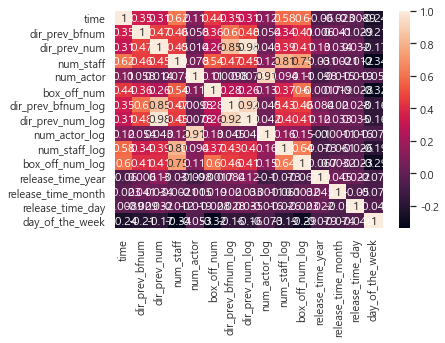

In [680]:
sns.heatmap(train.corr(), annot=True)

In [681]:
# 장르별 관객수의 평균
gen_box = train[["genre", "box_off_num_log"]].groupby("genre").median().sort_values("box_off_num_log")

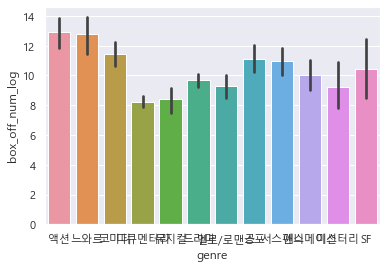

In [682]:
sns.barplot(data=train, x="genre", y="box_off_num_log")

#### 상영시간

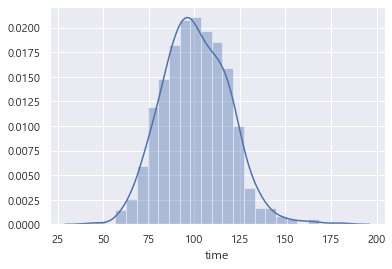

In [683]:
sns.distplot(train["time"])

In [635]:
# 상영시간을 그룹화
train.loc[train['time'] <= 20,'time_binning'] = 0
train.loc[(train['time'] > 20) & (train['time'] <= 40),'time_binning'] = 1
train.loc[(train['time'] > 40) & (train['time'] <= 60),'time_binning'] = 2
train.loc[(train['time'] > 60) & (train['time'] <= 80),'time_binning'] = 3
train.loc[(train['time'] > 80) & (train['time'] <= 100),'time_binning'] = 4
train.loc[(train['time'] > 100) & (train['time'] <= 120),'time_binning'] = 5
train.loc[(train['time'] > 120) & (train['time'] <= 140),'time_binning'] = 6
train.loc[(train['time'] > 140) & (train['time'] <= 160),'time_binning'] = 7
train.loc[train['time'] > 160,'time_binning'] = 8

              box_off_num_log
time_binning                 
2.0                  6.887698
3.0                  6.984206
4.0                  7.876529
5.0                 12.633439
6.0                 14.331945


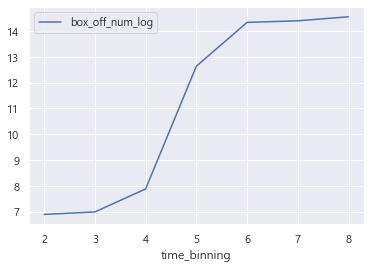

In [636]:
train_time_pivot = train.pivot_table(values="box_off_num_log", index="time_binning", aggfunc=np.median)
print(train_time_pivot.head())
train_time_pivot.plot()

### 상영등급에 따른 관객수

               box_off_num_log
screening_rat                 
12세 관람가               9.867816
15세 관람가              12.397554
전체 관람가                9.026716
청소년 관람불가              8.037543


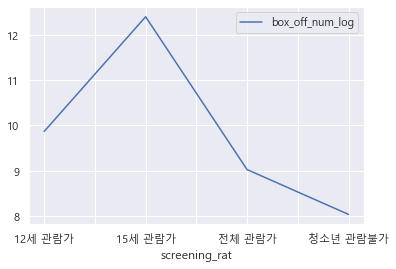

In [596]:
train_rate_pivot = train.pivot_table(values="box_off_num_log", index="screening_rat", aggfunc=np.median)
print(train_rate_pivot.head())
train_rate_pivot.plot()

### 배급사에 따른 관객수

                box_off_num_log
distributor                    
(주) 브릿지웍스              7.861727
(주) 액티버스엔터테인먼트         6.296279
(주) 영화사조제              7.206558
(주) 영화제작전원사           10.579438
(주) 케이알씨지              6.429446
...                         ...
필름라인                   8.537192
하준사                    6.398595
한국YWCA연합회              4.276666
홀리가든                   7.478974
화앤담이엔티                11.786259

[168 rows x 1 columns]


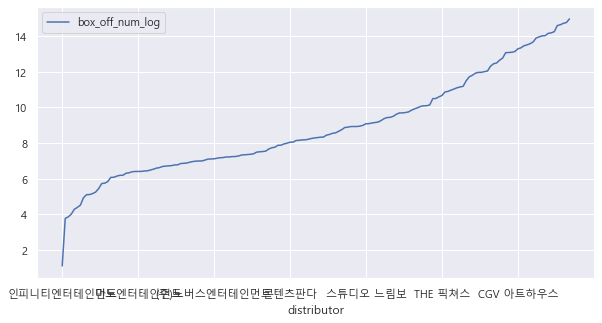

In [597]:
train_distributor_pivot = train.pivot_table(values="box_off_num_log", index="distributor", aggfunc=np.median)
print(train_distributor_pivot)
plt.rcParams["figure.figsize"] = (10,5)
train_distributor_pivot.sort_values(by='box_off_num_log').plot()

### 개봉 요일에 따른 관객수

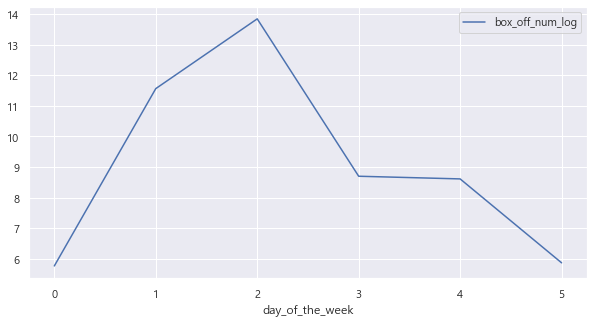

In [598]:
train_DoW_pivot = train.pivot_table(values="box_off_num_log", index="day_of_the_week", aggfunc=np.median)
train_DoW_pivot.plot()

### 러닝타임, 이전 작품 관객 수, 이전 작품 수, 출연 배우 수에 따른 관객수 

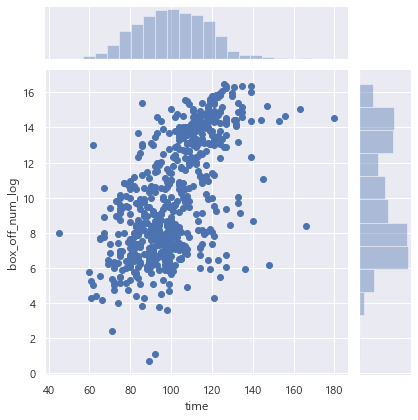

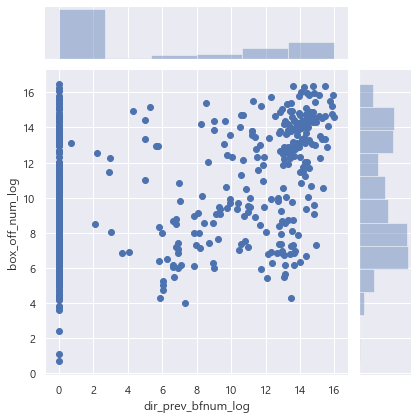

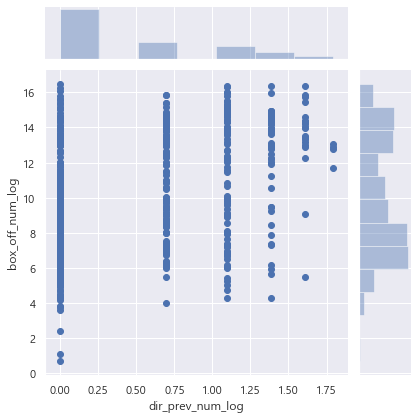

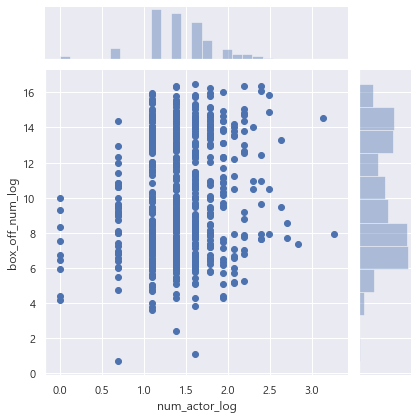

In [599]:
sns.jointplot(data=train, x="time", y="box_off_num_log", kind = "scatter")
sns.jointplot(data=train, x="dir_prev_bfnum_log", y="box_off_num_log", kind = "scatter")
sns.jointplot(data=train, x="dir_prev_num_log", y="box_off_num_log", kind = "scatter")
sns.jointplot(data=train, x="num_actor_log", y="box_off_num_log", kind = "scatter")

### 스태프 수에 따른 관객 수

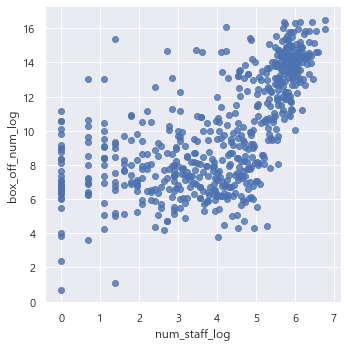

In [600]:
sns.lmplot(data=train, x="num_staff_log", y="box_off_num_log", fit_reg=False)

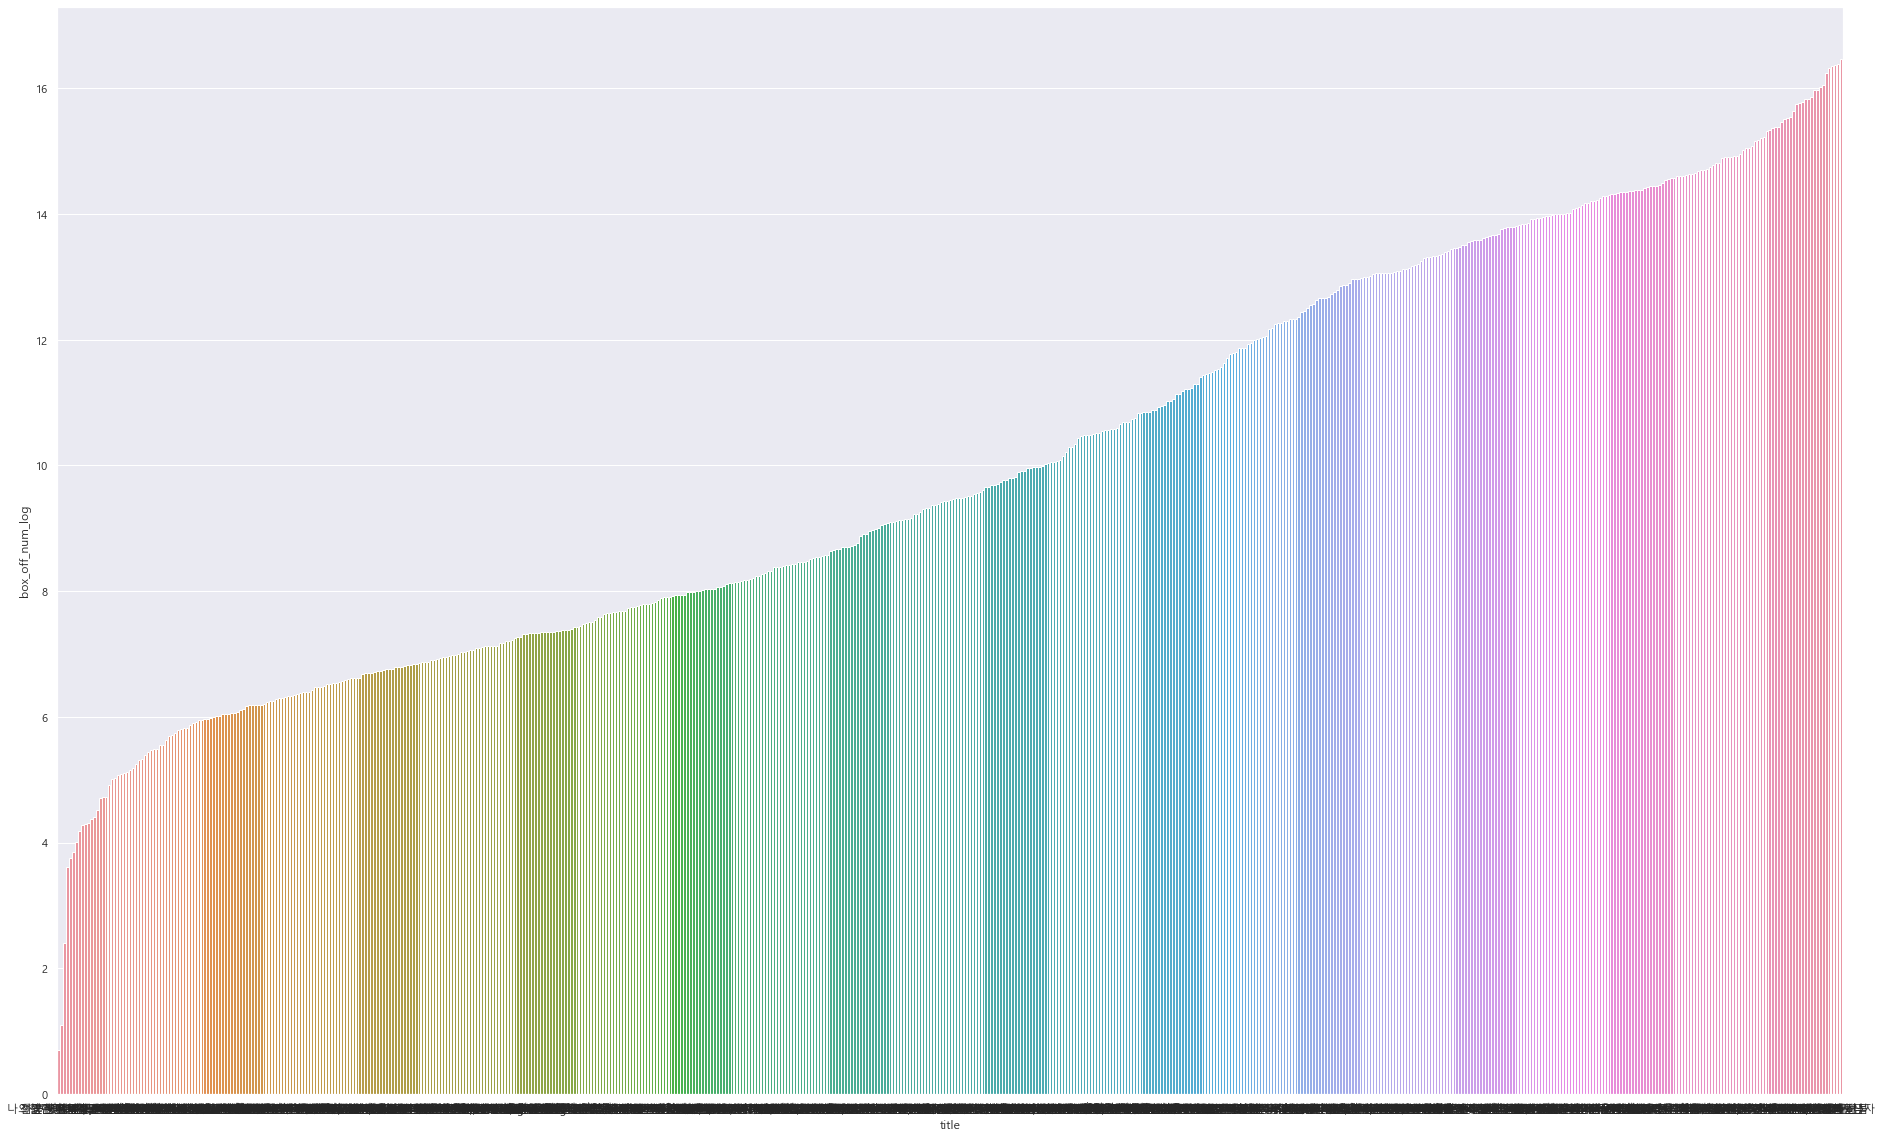

In [637]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(32, 20)

train_sorted_by_BOF = train.sort_values(by='box_off_num_log')
sns.barplot(data=train_sorted_by_BOF, x='title', y="box_off_num_log", ax=ax1)

### 필요없는 열 삭제

In [684]:
train_dummy = train_dummy.drop(["title", "director", "release_time", "distributor", "dir_prev_bfnum", "dir_prev_num", "num_staff", "num_actor"], axis=1)
test_dummy = test_dummy.drop(["title", "director", "release_time", "distributor", "dir_prev_bfnum", "dir_prev_num", "num_staff", "num_actor"], axis=1)

In [685]:
print(train_dummy.columns)
print(test_dummy.columns)

Index(['time', 'box_off_num', 'dir_prev_bfnum_log', 'dir_prev_num_log',
       'num_actor_log', 'num_staff_log', 'box_off_num_log',
       'release_time_year', 'release_time_month', 'release_time_day',
       'day_of_the_week', 'genre_SF', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가', 'distributor_coded'],
      dtype='object')
Index(['time', 'dir_prev_bfnum_log', 'dir_prev_num_log', 'num_actor_log',
       'num_staff_log', 'release_time_year', 'release_time_month',
       'release_time_day', 'day_of_the_week', 'genre_SF', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'distributor_coded'],
      dtype='object')


### 아웃라이어 제거

In [686]:
from sklearn.ensemble import IsolationForest

# Isolation Forest 방법을 사용하기 위해, 변수로 선언을 해 준다.
clf = IsolationForest(max_samples=len(train_dummy), random_state=1)

# fit 함수를 이용하여, 데이터셋을 학습시킨다. race_for_out은 dataframe의 이름이다.
clf.fit(train_dummy)

# predict 함수를 이용하여, outlier를 판별해 준다. -1과 1로 이루어진 Series형태의 데이터가 나온다.
y_pred_outliers = clf.predict(train_dummy)


# 원래의 dataframe에 붙이기. 데이터가 -1인 것이 outlier이기 때문에, -1인 것을 제거하면 outlier가 제거된  dataframe을 얻을 수 있다.
out = pd.DataFrame(y_pred_outliers)
out = out.rename(columns={0: "out"})
df_include_outlier = pd.concat([train_dummy, out], 1)

In [687]:
index_list = df_include_outlier.loc[df_include_outlier["out"] == -1].index
train_dummy = train_dummy.drop(index_list)

In [688]:
train_dummy

,time,box_off_num,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,box_off_num_log,release_time_year,release_time_month,release_time_day,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,distributor_coded
0,96,23398,0.000000,0.000000,1.098612,4.521789,10.060449,2012,11,22,...,0,0,0,0,1,0,0,0,0,0.0
1,130,7072501,13.965312,1.098612,1.386294,5.961005,15.771725,2015,11,19,...,0,0,0,0,0,0,0,0,0,1.0
2,123,6959083,12.304905,1.609438,1.609438,5.840642,15.755558,2013,6,5,...,0,0,0,0,1,0,0,1,0,1.0
3,101,217866,10.081425,1.098612,1.945910,3.044522,12.291640,2012,7,12,...,0,0,0,0,0,1,0,0,1,2.0
4,108,483387,0.693147,0.693147,1.098612,5.529429,13.088575,2010,11,4,...,0,0,0,0,0,1,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,94,1958,0.000000,0.000000,1.791759,3.637586,7.580189,2014,3,20,...,0,0,0,0,0,1,0,0,0,33.0
595,111,1475091,8.251664,0.693147,2.079442,6.236370,14.204231,2014,8,13,...,0,0,0,0,0,0,0,0,0,2.0
596,127,1716438,13.114456,0.693147,1.945910,5.659482,14.355762,2013,3,14,...,0,0,0,0,0,0,0,1,0,1.0
597,99,2475,0.000000,0.000000,1.609438,4.820282,7.814400,2010,9,30,...,0,0,0,0,0,0,0,0,0,33.0


### Training

In [689]:
label = "box_off_num"

In [690]:
# 트레이닝에 사용할 피쳐들의 데이터만 추출
# X_train = train[feature_names]
# print(X_train.shape)

# X_test = test[feature_names]
# print(X_test.shape)

X_train = train_dummy
X_train = X_train.drop(["box_off_num", "box_off_num_log"], axis=1)
X_test = test_dummy

print(X_train.columns)
print(X_test.columns)

# 구할 레이블
y_train = train_dummy[label]

Index(['time', 'dir_prev_bfnum_log', 'dir_prev_num_log', 'num_actor_log',
       'num_staff_log', 'release_time_year', 'release_time_month',
       'release_time_day', 'day_of_the_week', 'genre_SF', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'distributor_coded'],
      dtype='object')
Index(['time', 'dir_prev_bfnum_log', 'dir_prev_num_log', 'num_actor_log',
       'num_staff_log', 'release_time_year', 'release_time_month',
       'release_time_day', 'day_of_the_week', 'genre_SF', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'distributor_coded'],
      dtype='object')


In [691]:
train_dummy.head()

,time,box_off_num,dir_prev_bfnum_log,dir_prev_num_log,num_actor_log,num_staff_log,box_off_num_log,release_time_year,release_time_month,release_time_day,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,distributor_coded
0,96,23398,0.000000,0.000000,1.098612,4.521789,10.060449,2012,11,22,...,0,0,0,0,1,0,0,0,0,0.0
1,130,7072501,13.965312,1.098612,1.386294,5.961005,15.771725,2015,11,19,...,0,0,0,0,0,0,0,0,0,1.0
2,123,6959083,12.304905,1.609438,1.609438,5.840642,15.755558,2013,6,5,...,0,0,0,0,1,0,0,1,0,1.0
3,101,217866,10.081425,1.098612,1.945910,3.044522,12.291640,2012,7,12,...,0,0,0,0,0,1,0,0,1,2.0
4,108,483387,0.693147,0.693147,1.098612,5.529429,13.088575,2010,11,4,...,0,0,0,0,0,1,0,1,0,3.0


### RMSE Evaluation
RMSE를 구하는 함수

In [693]:
import numpy as np
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    
    return score

rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

### Hyper Parameter Tuning

In [694]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300,
                              n_jobs=-1,
                              random_state=37)


#### Coarse to Fine Search
Coarse 단계에서는 넓은 범위에서 다양하게 하이퍼파라미터를 적용하여 성능이 잘 나오는 좁은 구간을 찾고
Fine 단계에서 성능이 잘 나온 구간에서 다시 하이퍼파라미터 튜닝을 하여 제일 성능이 잘 나오는 하이퍼파라미터값을 찾음

In [695]:
# Coarse
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

n_estimators = 300

# 랜덤 서치 횟수
num_epoch = 100

# hyperparameter 탐색 결과가 저장될 리스트
coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    # max depth의 값을 2~100으로 설정
    max_depth = np.random.randint(low=2, high=100)

    # 적용할 feature의 비율을 0.1~1.0로 설정
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    # cross_val_score를 실행하여 rmse의 평균 계산
    # cv는 데이터 조각 개수
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    # hyperparameter 탐색 결과를 저장할 딕셔너리
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과 저장
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 DataFrame으로 변환
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# coarse_hyperparameters_list를 score가 낮은 순으로 정렬
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개 출력
coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 79, max_features = 0.182917, Score = 1187045.42798
 1 n_estimators = 300, max_depth =  7, max_features = 0.855540, Score = 1297478.10321
 2 n_estimators = 300, max_depth = 67, max_features = 0.174619, Score = 1187045.42798
 3 n_estimators = 300, max_depth = 29, max_features = 0.761507, Score = 1307933.89260
 4 n_estimators = 300, max_depth = 66, max_features = 0.212853, Score = 1201994.53860
 5 n_estimators = 300, max_depth = 36, max_features = 0.530802, Score = 1256001.60309
 6 n_estimators = 300, max_depth = 33, max_features = 0.509611, Score = 1255871.82278
 7 n_estimators = 300, max_depth = 42, max_features = 0.904069, Score = 1318828.08549
 8 n_estimators = 300, max_depth = 75, max_features = 0.466460, Score = 1264059.99806
 9 n_estimators = 300, max_depth = 95, max_features = 0.540221, Score = 1256020.85350
10 n_estimators = 300, max_depth = 61, max_features = 0.257007, Score = 1214563.73697
11 n_estimators = 300, max_depth = 32, max_features = 

96 n_estimators = 300, max_depth = 80, max_features = 0.904351, Score = 1318828.08549
97 n_estimators = 300, max_depth = 74, max_features = 0.408243, Score = 1218676.01898
98 n_estimators = 300, max_depth = 27, max_features = 0.860033, Score = 1307854.61855
99 n_estimators = 300, max_depth =  3, max_features = 0.583006, Score = 1211563.69708
(100, 5)


,epoch,score,n_estimators,max_depth,max_features
58,58,1.186117e+06,300,13,0.108591
40,40,1.187045e+06,300,87,0.175856
51,51,1.187045e+06,300,88,0.202358
18,18,1.187045e+06,300,34,0.170483
0,0,1.187045e+06,300,79,0.182917
2,2,1.187045e+06,300,67,0.174619
54,54,1.193664e+06,300,20,0.229361
57,57,1.194828e+06,300,21,0.206660
85,85,1.196426e+06,300,3,0.351106
11,11,1.196508e+06,300,32,0.133345


In [ ]:
# Fine
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

n_estimators = 300
num_epoch = 100
finer_hyperparameters_list = []

for epoch in range(num_epoch):
    # coarse 단계에서 찾은 뎁스와 피쳐비율 구간을 적용
    max_depth = np.random.randint(low=2, high=60)
    max_features = np.random.uniform(low=0.1, high=0.4)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    finer_hyperparameters_list.append(hyperparameters)
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

finer_hyperparameters_list = pd.DataFrame.from_dict(finer_hyperparameters_list)
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by="score")
print(finer_hyperparameters_list.shape)

finer_hyperparameters_list.head(10)

In [ ]:
# 가장 정확도가 높은 하이퍼패러미터를 저장
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_max_depth = best_hyperparameters["max_depth"]
best_max_features = best_hyperparameters["max_features"]

print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

### Random Forest

In [696]:
from sklearn.ensemble import RandomForestRegressor

best_max_depth = 88.0
best_max_features = 0.202358

best_n_estimators = 3000
model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=88.0, max_features=0.202358,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [697]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=88.0, max_features=0.202358,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

### Predict

In [698]:
y_predicted = model.predict(X_test)
y_predicted

array([2.49515834e+06, 1.34852251e+06, 1.52944996e+06, 1.52616202e+06,
       9.58314899e+05, 3.24495305e+05, 1.98130912e+05, 9.33755997e+04,
       1.00121234e+05, 5.76342560e+05, 5.48799584e+05, 9.96879591e+05,
       1.06624724e+06, 1.40420468e+05, 9.82617119e+05, 1.99286453e+06,
       2.79795669e+05, 5.97283885e+05, 5.18872468e+05, 4.42361732e+05,
       1.40332340e+05, 1.16501079e+05, 1.01056184e+06, 7.02086876e+05,
       1.10267456e+05, 1.54290452e+06, 1.90441850e+04, 7.47458873e+05,
       2.50630885e+05, 6.08744527e+04, 1.46048294e+06, 9.43430930e+04,
       2.37094339e+05, 1.37357229e+06, 9.30517447e+04, 3.55401110e+05,
       1.14603225e+05, 3.49735787e+04, 1.77877670e+04, 1.52055720e+04,
       1.13708681e+05, 1.24724169e+05, 3.06614094e+05, 1.21524831e+06,
       9.30646189e+05, 1.06224135e+06, 7.67333180e+04, 4.92493350e+04,
       1.14615339e+06, 1.44411470e+04, 4.32894603e+04, 6.73083932e+05,
       1.93779759e+05, 1.24113405e+06, 9.02426478e+05, 5.40615752e+05,
      

In [704]:
submission = pd.read_csv("./data/submission_.csv", engine='python')
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [705]:
submission["box_off_num"] = y_predicted
submission.to_csv('./data/submission.csv', index= False)